# Final Project for Computer Vision: CoAtNet

Sangwook Suh

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [6]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [2]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.7 MB/s eta 0:00:00


In [7]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.tensorboard import SummaryWriter
import torchvision
from torchvision import transforms

from einops import rearrange
from einops.layers.torch import Rearrange

import timm

from PIL import Image
from datasets import load_dataset

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

ModuleNotFoundError: No module named 'datasets'

In [ ]:
# Check is GPU is enabled
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

# Get specific GPU model
if str(device) == "cuda:0":
  print("GPU: {}".format(torch.cuda.get_device_name(0)))

# CoAtNet - Final Project

## Load Data

In [ ]:
dataset = load_dataset("zh-plus/tiny-imagenet")

In [ ]:
train, valid = dataset['train'], dataset['valid']

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

def transform(img):

    func = None

    if img.mode == "L":

        func = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,)),
        ])

    else:
        func = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,)),
        ])

    return func(img)


def transform_b(img):

    func = None

    if img.mode == "L":

        func = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.GaussianBlur(17, sigma=(5.0,5.0)),
            transforms.Normalize((0.5,), (0.5,)),
        ])

    else:
        func = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.GaussianBlur(17, sigma=(5.0,5.0)),
            transforms.Normalize((0.5,), (0.5,)),
        ])

    return func(img)

def transform_n(img):

    func = None

    if img.mode == "L":

        func = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x + torch.rand(x.size()) * 0.7 + 0),
            transforms.Normalize((0.5,), (0.5,)),
        ])

    else:
        func = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x + torch.rand(x.size()) * 0.7 + 0),
            transforms.Normalize((0.5,), (0.5,)),
        ])

    return func(img)

In [ ]:
sample = train['image'][0]

In [ ]:
to_im = lambda x: plt.imshow(np.transpose((x/2 + 0.5).numpy(), (1, 2, 0)))

In [ ]:
to_im(transform(sample))

In [ ]:
to_im(transform_b(sample))

In [ ]:
to_im(transform_n(sample))

In [4]:
blurred_training_set = CustomDataset(images=train['image'], labels=train['label'], transform=transform_b)
blurred_validation_set = CustomDataset(images=valid['image'], labels=valid['label'], transform=transform_b)

blurred_training_loader = torch.utils.data.DataLoader(blurred_training_set, batch_size=4, shuffle=False)
blurred_validation_loader = torch.utils.data.DataLoader(blurred_validation_set, batch_size=4, shuffle=False)

NameError: name 'CustomDataset' is not defined

In [5]:
noisy_training_set = CustomDataset(images=train['image'], labels=train['label'], transform=transform_n)
noisy_validation_set = CustomDataset(images=valid['image'], labels=valid['label'], transform=transform_n)

noisy_training_loader = torch.utils.data.DataLoader(noisy_training_set, batch_size=4, shuffle=False)
noisy_validation_loader = torch.utils.data.DataLoader(noisy_validation_set, batch_size=4, shuffle=False)

NameError: name 'CustomDataset' is not defined

LABELS:     0             0             0             0


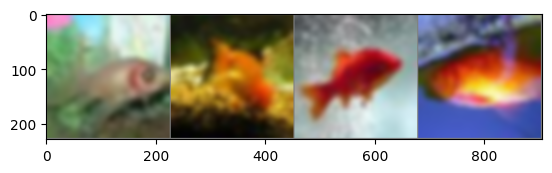

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(blurred_training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=False)
classes = tuple( str(i) for i in range(200))
print('LABELS:     '+'             '.join(classes[labels[j]] for j in range(4)))

LABELS:     0             0             0             0


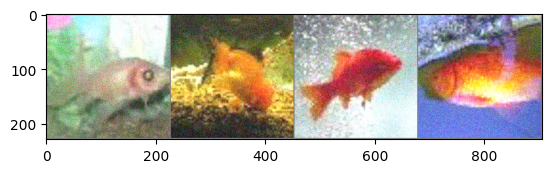

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(noisy_training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=False)
classes = tuple( str(i) for i in range(200))
print('LABELS:     '+'             '.join(classes[labels[j]] for j in range(4)))

In [ ]:
blurred_training_loader = torch.utils.data.DataLoader(blurred_training_set, batch_size=128, shuffle=True)
blurred_validation_loader = torch.utils.data.DataLoader(blurred_validation_set, batch_size=128, shuffle=False)

noisy_training_loader = torch.utils.data.DataLoader(noisy_training_set, batch_size=128, shuffle=True)
noisy_validation_loader = torch.utils.data.DataLoader(noisy_validation_set, batch_size=128, shuffle=False)

In [ ]:
training_set = CustomDataset(images=train['image'], labels=train['label'], transform=transform)
validation_set = CustomDataset(images=valid['image'], labels=valid['label'], transform=transform)

training_loader = torch.utils.data.DataLoader(training_set, batch_size=128, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

## Model

In [ ]:
!pwd

/content


In [ ]:
# model = timm.create_model('coatnet_0_rw_224.sw_in1k', pretrained=True).to(device)
model = torch.load('/content/model_20240423_073506_0')

## Fine-Tuning

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.000001, momentum=0.9)

In [ ]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    for i, (inputs, labels) in enumerate(training_loader):

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs).to(device)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 500 == 499:
            last_loss = running_loss / 500
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [ ]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 2

best_vloss = 1_000_000.
best_acc = -1.0

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)
    running_vloss = 0.0

    model.eval()

    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata[0].to(device), vdata[1].to(device)
            voutputs = model(vinputs).to(device)

            # Loss
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

            # Accuracy
            _, predicted = torch.max(voutputs, 1)
            correct_predictions += (predicted == vlabels).sum().item()
            total_predictions += vlabels.size(0)

    accuracy = correct_predictions / total_predictions
    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {} ACCURACY valid {}'.format(avg_loss, avg_vloss, accuracy))

    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    if accuracy > best_acc:
        best_acc = accuracy
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model, model_path)

    epoch_number += 1

EPOCH 1:
  batch 500 loss: 0.09634612406976521
LOSS train 0.09634612406976521 valid 0.5609720349311829 ACCURACY valid 0.8625
EPOCH 2:
  batch 500 loss: 0.09673089020326733


KeyboardInterrupt: 

## Evaluation


### Baseline

In [ ]:
model.eval()

correct_predictions = 0
total_predictions = 0

for batch_images, batch_labels in validation_loader:
    batch_images, batch_labels = batch_images.to(device), batch_labels.to(device)

    # Perform forward pass
    with torch.no_grad():  # Disable gradient computation for inference
        outputs = model(batch_images)

    # Get predicted labels
    _, predicted = torch.max(outputs, 1)

    # Update counts
    correct_predictions += (predicted == batch_labels).sum().item()
    total_predictions += batch_labels.size(0)

# Calculate overall accuracy
accuracy = correct_predictions / total_predictions

print(f"Accuracy on testing set: {accuracy:.4f}")

Accuracy on testing set: 0.8625


### Blurred Images

In [ ]:
# model = torch.load('model_path')
# model = torch.load('/content/model_20240423_073506_0')
model.eval()

correct_predictions = 0
total_predictions = 0

for batch_images, batch_labels in blurred_validation_loader:
    batch_images, batch_labels = batch_images.to(device), batch_labels.to(device)

    # Perform forward pass
    with torch.no_grad():  # Disable gradient computation for inference
        outputs = model(batch_images)

    # Get predicted labels
    _, predicted = torch.max(outputs, 1)

    # Update counts
    correct_predictions += (predicted == batch_labels).sum().item()
    total_predictions += batch_labels.size(0)

# Calculate overall accuracy
accuracy = correct_predictions / total_predictions

print(f"Accuracy on testing set: {accuracy:.4f}")

Accuracy on testing set: 0.4849


### Images with added Noise

In [ ]:
model.eval()

correct_predictions = 0
total_predictions = 0

for batch_images, batch_labels in noisy_validation_loader:
    batch_images, batch_labels = batch_images.to(device), batch_labels.to(device)

    # Perform forward pass
    with torch.no_grad():  # Disable gradient computation for inference
        outputs = model(batch_images)

    # Get predicted labels
    _, predicted = torch.max(outputs, 1)

    # Update counts
    correct_predictions += (predicted == batch_labels).sum().item()
    total_predictions += batch_labels.size(0)

# Calculate overall accuracy
accuracy = correct_predictions / total_predictions

print(f"Accuracy on testing set: {accuracy:.4f}")

Accuracy on testing set: 0.6067


## References

@article{dai2021coatnet,
  title={CoAtNet: Marrying Convolution and Attention for All Data Sizes},
  author={Dai, Zihang and Liu, Hanxiao and Le, Quoc V and Tan, Mingxing},
  journal={arXiv preprint arXiv:2106.04803},
  year={2021}
}

@misc{tiny-imagenet,
    author = {mnmoustafa, Mohammed Ali},
    title = {Tiny ImageNet},
    publisher = {Kaggle},
    year = {2017},
    url = {https://kaggle.com/competitions/tiny-imagenet}
}

@misc{Training-with-PyTorch,
	author = {},
	title = {{T}raining with {P}y{T}orch \&#x2014; {P}y{T}orch {T}utorials 2.3.0+cu121 documentation --- pytorch.org},
	howpublished = {\url{https://pytorch.org/tutorials/beginner/introyt/trainingyt.html}},
	year = {},
	note = {[Accessed 22-04-2024]},
}